In [1]:
library(tidyverse)
library(keras)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2.9000     ✔ purrr   0.3.4     
✔ tibble  3.0.3          ✔ dplyr   1.0.1     
✔ tidyr   1.1.1          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.5.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
submision_sample <- read_csv("/kaggle//input//landmark-recognition-2020//sample_submission.csv")

Parsed with column specification:
cols(
  id = col_character(),
  landmarks = col_character()
)



In [3]:
# Train
train_dataframe <- read_csv("/kaggle//input//1-read-landmark-recognition-train-test-validation/train_dataframe.csv")
train <- readRDS(file = "/kaggle/input/train-generator/train.Rds")


Parsed with column specification:
cols(
  id = col_character(),
  file_path = col_character(),
  landmark_id = col_double(),
  count_class = col_double()
)



In [4]:
val_dataframe <- read_csv("/kaggle//input/1-read-landmark-recognition-train-test-validation/val_dataframe.csv")
validation <- readRDS(file = "/kaggle//input//validation-generator//validation.Rds")

Parsed with column specification:
cols(
  id = col_character(),
  file_path = col_character(),
  landmark_id = col_double(),
  count_class = col_double()
)



In [5]:
output=length(unique(train_dataframe$landmark_id))
output

[1] 7

In [6]:
# model
model <- keras_model_sequential() %>%
layer_dense(units = 256, activation = "relu", input_shape = 4 * 4 * 512) %>%
layer_dropout(rate = 0.5) %>%
layer_dense(units = 256, activation = "relu") %>%
layer_dropout(rate = 0.5) %>%
layer_dense(units = output, activation = "softmax")

In [7]:
model

Model
Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 256)                     2097408     
________________________________________________________________________________
dropout (Dropout)                   (None, 256)                     0           
________________________________________________________________________________
dense_1 (Dense)                     (None, 256)                     65792       
________________________________________________________________________________
dropout_1 (Dropout)                 (None, 256)                     0           
________________________________________________________________________________
dense_2 (Dense)                     (None, 7)                       1799        
Total params: 2,164,999
Trainable params: 2,164,999
Non-trainable params: 0
_______

In [8]:
model %>% compile(
optimizer = optimizer_rmsprop(lr = 2e-5),
loss = "categorical_crossentropy",
metrics = c("categorical_accuracy")
)

In [9]:
batch_size = 64

In [10]:
# train model
history <- model %>% fit(
train$features, 
train$labels,
epochs = 35,
batch_size = batch_size,
validation_data = list(validation$features, validation$labels)
)

Trained on 11,712 samples (batch_size=64, epochs=35)
Final epoch (plot to see history):
                    loss: 0.1288
    categorical_accuracy: 0.9606
                val_loss: 0.1532
val_categorical_accuracy: 0.9517 

`geom_smooth()` using formula 'y ~ x'



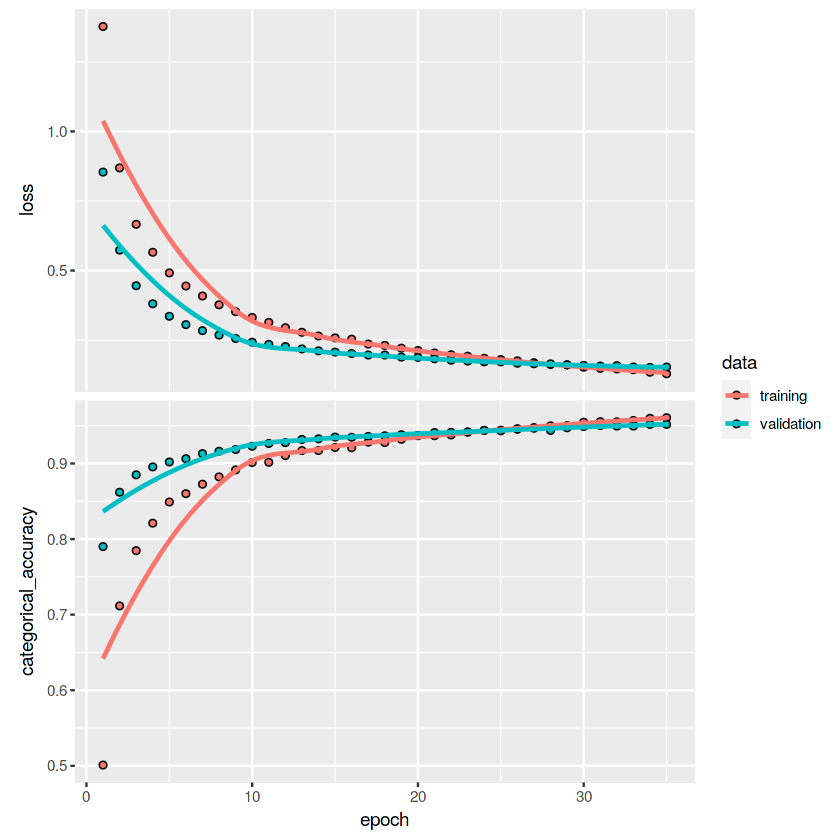

In [11]:
history
plot(history)

In [12]:
save_model_hdf5(model,"model_v1.h5")

In [13]:

train_dataframe$landmark_id <- as.character(train_dataframe$landmark_id)
col_names <- readRDS(file = "/kaggle//input/train-generator/col_names.Rds")

In [14]:
# landmark_id index
predict_label <-function(data=train){
namedLabeled <<- c()
col_pred <<- model %>% predict_classes(data[[1]]) 
for (i in 1:length(col_pred)) {
    namedLabeled[i] <<- col_names[col_pred[i]+1]  
 }
print(str(namedLabeled))    
}    

In [15]:
predict_label(train)

 chr [1:11712] "138982" "20409" "113209" "126637" "83144" "20409" "126637" ...
NULL


In [16]:
train_dataframe <- mutate(train_dataframe, predict = namedLabeled)
head(train_dataframe)
dim(train_dataframe)


id,file_path,landmark_id,count_class,predict
<chr>,<chr>,<chr>,<dbl>,<chr>
66a05adde31f5a66,../input//landmark-recognition-2020/train//6/6/a/66a05adde31f5a66.jpg,138982,6272,138982
a5ed190d9b9e9387,../input//landmark-recognition-2020/train//a/5/e/a5ed190d9b9e9387.jpg,126637,2231,20409
4312fc17806e1e6a,../input//landmark-recognition-2020/train//4/3/1/4312fc17806e1e6a.jpg,20409,1758,113209
fa2615c7cedc5ff2,../input//landmark-recognition-2020/train//f/a/2/fa2615c7cedc5ff2.jpg,20409,1758,126637
1d823dcb048afe5b,../input//landmark-recognition-2020/train//1/d/8/1d823dcb048afe5b.jpg,20409,1758,83144
a5080e4d5086c21a,../input//landmark-recognition-2020/train//a/5/0/a5080e4d5086c21a.jpg,83144,1741,20409


[1] 11712     5

In [17]:
actual <- train_dataframe$landmark_id
preds <- train_dataframe$predict

In [18]:
percision_index <- function(preds, actual){
x <- mda::confusion(as.factor(preds),as.factor(actual))
dataFrame <- data.frame(x)
dataFrame <- dataFrame %>% mutate(result=ifelse(predicted==true,1,0))
totalTrueP <- dataFrame %>% filter(result==1)
totalTrueP <- sum(totalTrueP$Freq)
totalTrueFalse <- dataFrame %>% filter(result==0)
totalTrueFalse <- sum(totalTrueFalse$Freq)
totalmicroPercision <- totalTrueP/(totalTrueP+totalTrueFalse)
print(glue::glue("totalmicroPercision: {round(totalmicroPercision,2)}"))

labels_names <- as.character(unique(actual))
length(labels_names)
koubas <<- tibble()
for (i in 1:length(labels_names)) {
filterTrue <- dataFrame %>% filter(predicted==labels_names[i] & result==1)
tp <- filterTrue$Freq
filterFalse <- dataFrame %>% filter(predicted==labels_names[i] & result==0)
tn <- sum(filterFalse$Freq)
percision <- round(tp/(tp+tn),2)
dataframe <- tibble(landmark_id=labels_names[i], tp=tp,tn=tn,percision=percision)
koubas <<- rbind(koubas,dataframe)
koubas <<- koubas %>% arrange(desc(percision))

#print(i)
}
print(dim(koubas))
head(koubas)
    
}

In [19]:
percision_index(preds = preds,actual = actual)

totalmicroPercision: 0.23
[1] 7 4


landmark_id,tp,tn,percision
<chr>,<int>,<int>,<dbl>
138982,1985,2848,0.41
126637,277,1534,0.15
20409,143,1197,0.11
83144,135,1187,0.10
194914,59,754,0.07
113209,64,816,0.07


In [20]:
# Predict Test_sub
testSub <- readRDS(file = "/kaggle/input/test-sub-generator/testSub.Rds")


In [21]:
predict_label(data = testSub)

 chr [1:10345] "20409" "83144" "126637" "126637" "177870" "126637" "138982" ...
NULL


In [22]:
length(namedLabeled)

[1] 10345

In [23]:
test_files <- read_csv("/kaggle/input//1-read-landmark-recognition-train-test-validation//test_files.csv")

Parsed with column specification:
cols(
  files = col_character(),
  file_path = col_character()
)



In [24]:
library(data.table)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


The following object is masked from ‘package:ggplot2’:

    :=




In [25]:
submission <- data.table(id = test_files$files,landmarks = paste(namedLabeled,round(koubas$percision,2),sep = " "))
#submission <- data.table(id = test_files$files,landmarks = paste(namedLabeled,0.1,sep = " "))
row.names(submission) <- NULL

In [26]:
str_count(submission$id[1])

[1] 16

In [27]:
dim(submission)
head(submission)

[1] 10345     2

id,landmarks
<chr>,<chr>
00084cdf8f600d00,20409 0.41
000b15b043eb8cf0,83144 0.15
0011a52f9b948fd2,126637 0.11
00141b8a5a729084,126637 0.1
0018aa4b92532b77,177870 0.07
001baaaab791d8db,126637 0.07


In [28]:
#write_csv(x = submission,path = "submission.csv")
fwrite(submission, "submission.csv",row.names = F) 